In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


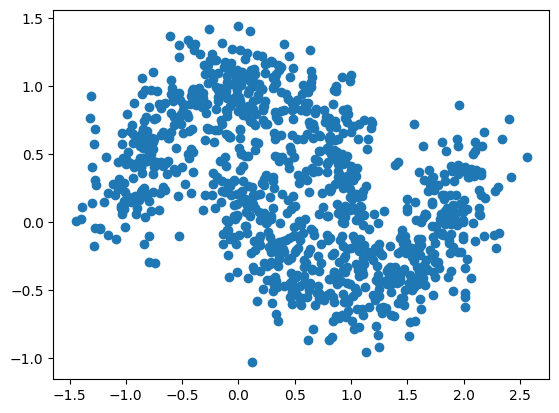

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

data, labels = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=None)
plt.scatter(data.T[0],data.T[1])

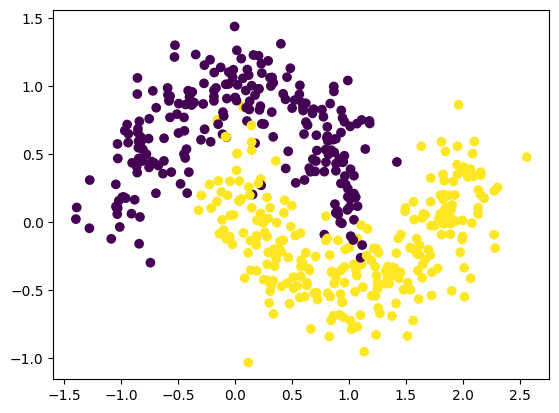

In [3]:
# Divide training test
from sklearn import model_selection
data_train, data_test, labels_train, labels_test =  model_selection.train_test_split(data, labels, test_size=.5, train_size=.5, random_state=None, shuffle=True, stratify=None)
plt.scatter(data_train.T[0], data_train.T[1], c = labels_train)

In [4]:
# Growing Spheres:
from scipy.special import gammainc
from matplotlib import pyplot as plt


def GrowingSpheres(clf, observation, m, n):
    stop = False
    x_pred = clf.predict([observation]) # in {-1, 1}
    while not stop:
        z = GenerateOnSL(observation, 0, m, n, 2)
        z_pred = clf.predict(z)
        stop = all(x_pred == z_unit for z_unit in z_pred)
        m = m/2
    a_0 = m
    a_1 = 2*m
    stop = False
    while all(z_unit == x_pred for z_unit in z_pred):
        z = GenerateOnSL(observation, a_0, a_1, n, 2)
        z_pred = clf.predict(z)
        a_0 = a_1
        a_1 = a_1 + m
    norm_distances = [np.linalg.norm(observation -z[i]) if z_pred[i] != x_pred else 0 for i in range(len(z_pred))]
    #for i, z_unit in enumerate(z):
    #    if(z_predz)
    return z[np.argmax(norm_distances)]
    
def GenerateOnSL(center, minR, maxR, nbSamples, dimensions):
    # we obtain r varying between minR and maxR
    R = np.random.uniform(minR, maxR, size = nbSamples)
    points = []
    x = np.random.normal(scale=1,size=(nbSamples, dimensions))
    x_norm = [x[i]/ np.linalg.norm(x, axis = 1)[i] for i in range(x.shape[0])]
    for i, x_point in enumerate(x_norm):
        r = np.random.uniform(minR,maxR)
        points.append(x_point * R[i] + center )
    return np.array(points)

In [5]:
from cProfile import label
from mlxtend.plotting import plot_decision_regions

def plotEverything(X,Y,classifier,title, obs, enemy):


    plot_decision_regions(X, Y, clf=classifier, legend=2)
    
    plt.scatter(obs[0], obs[1], c = 'lime',marker= 'x')
    plt.scatter(enemy.T[0], enemy.T[1], c = 'red', marker = 'o')
    # Adding axes annotations
    plt.title(title)
    plt.show()

In [32]:
choice = np.random.choice(len(data_test))
obs = data_test[choice]

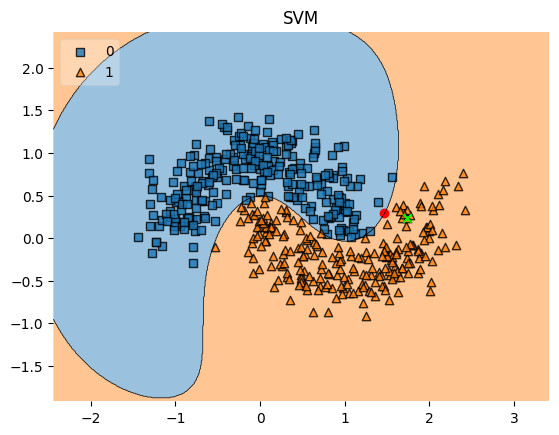

In [33]:

# SVM
#choice = np.random.choice(len(data_test))
#obs = data_test[choice]
from sklearn import svm

svmClassifier = svm.SVC()
svmClassifier.fit(data_train, labels_train)
prediction = svmClassifier.predict(data_test)
enemy = GrowingSpheres(svmClassifier, obs, 0.1, 20)
plotEverything(data_test,prediction,svmClassifier,'SVM', obs, enemy)

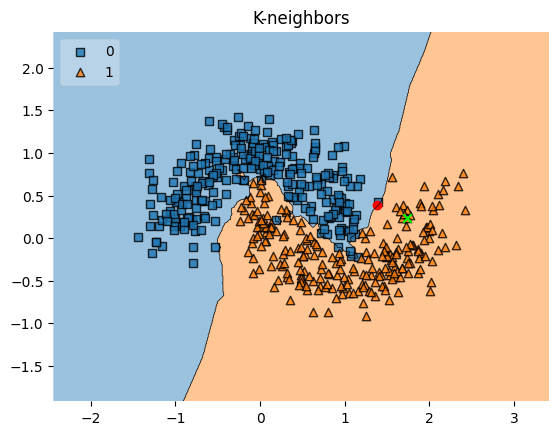

In [34]:
# KNNN
from sklearn import neighbors
#choice = np.random.choice(len(data_test))
#obs = data_test[choice]

knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(data_train, labels_train)
prediction = knnClassifier.predict(data_test)
enemy = GrowingSpheres(knnClassifier, obs, 0.1, 20)
plotEverything(data_test,prediction,knnClassifier,'K-neighbors', obs, enemy)


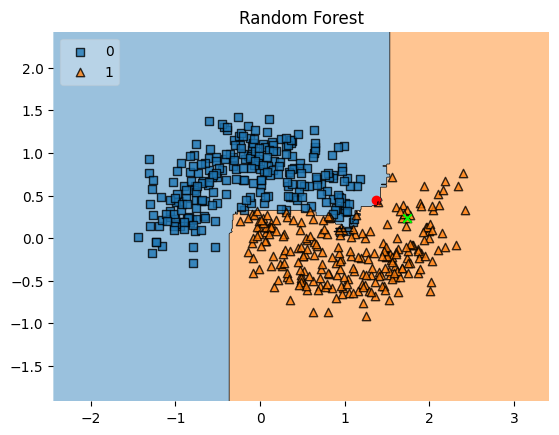

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#choice = np.random.choice(len(data_test))
#obs = data_test[choice]

rfClassifier = RandomForestClassifier(max_depth=4, random_state=0)
rfClassifier.fit(data_train, labels_train)
prediction = rfClassifier.predict(data_test)
enemy = GrowingSpheres(rfClassifier, obs, 0.1, 20)
plotEverything(data_test,prediction,rfClassifier,'Random Forest', obs, enemy)

In [38]:
# make sparce datasets
sparce_index = np.arange(len(data_train))
np.random.shuffle(sparce_index)
sparce_index = sparce_index[:int(len(data_train)/3)]
data_train_sparce = data_train[sparce_index]
labels_train_sparce = labels_train[sparce_index]

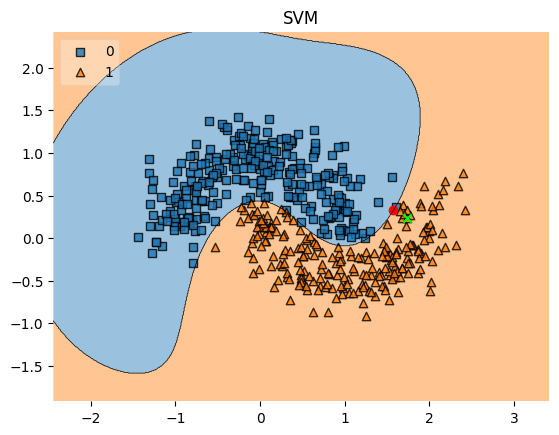

In [39]:
# SVM sparce
#choice = np.random.choice(len(data_test))
#obs = data_test[choice]
from sklearn import svm

svmClassifier = svm.SVC()
svmClassifier.fit(data_train_sparce, labels_train_sparce)
prediction = svmClassifier.predict(data_test)
enemy = GrowingSpheres(svmClassifier, obs, 0.1, 20)
plotEverything(data_test,prediction,svmClassifier,'SVM', obs, enemy)

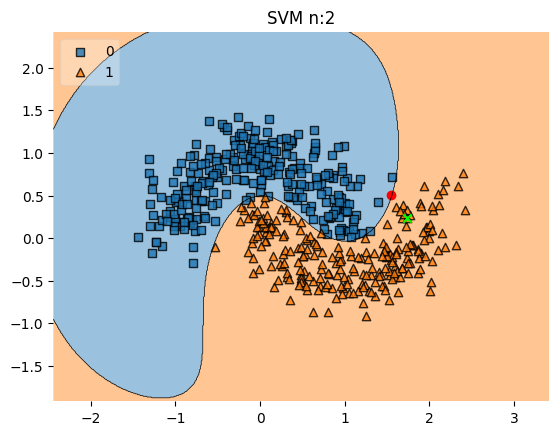

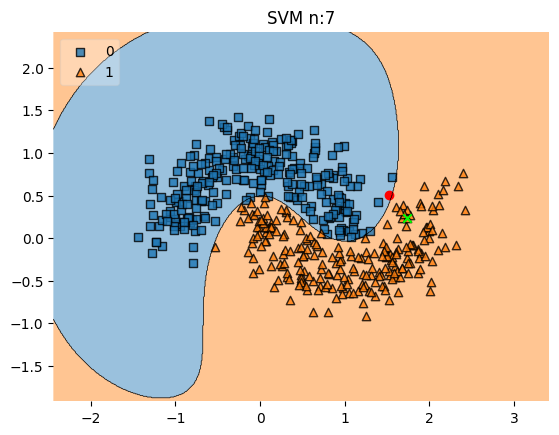

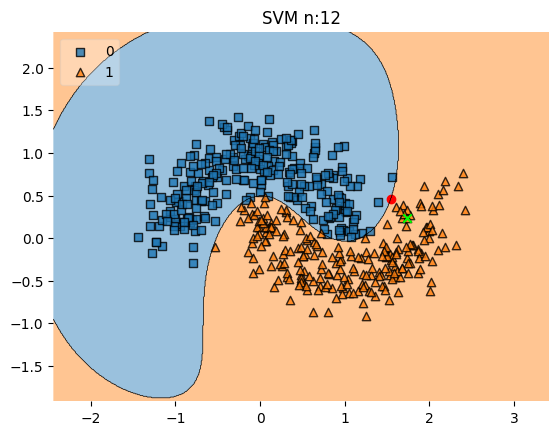

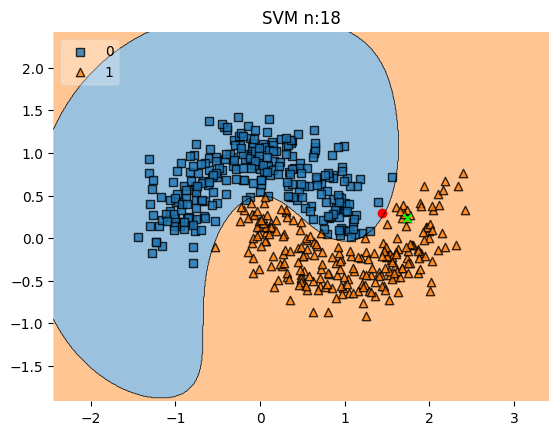

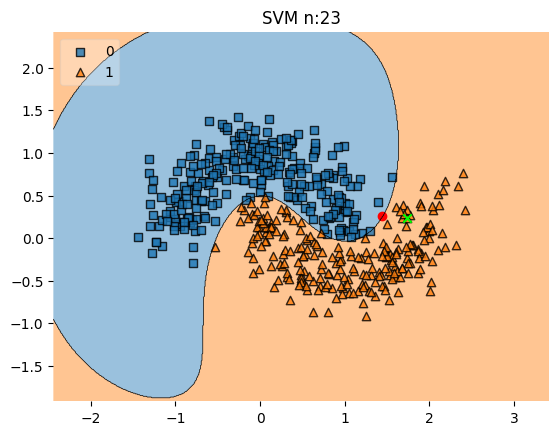

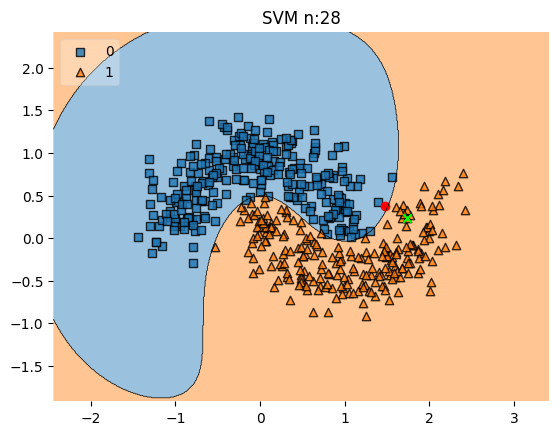

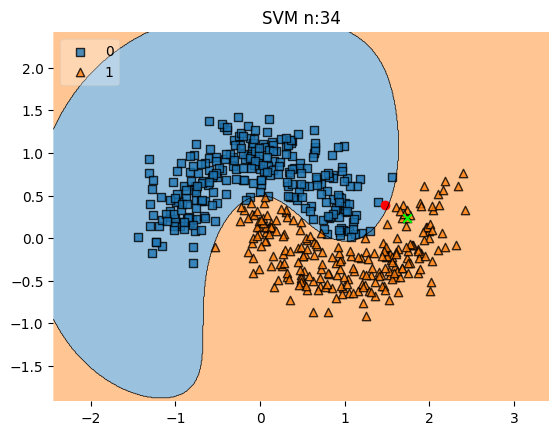

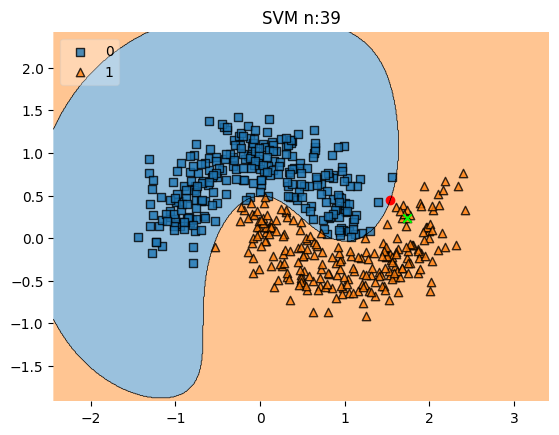

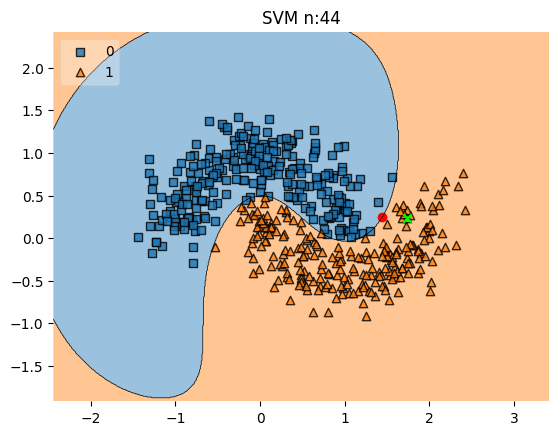

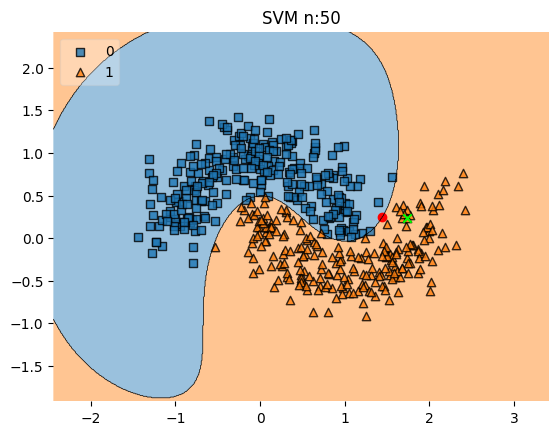

In [40]:
# SVM varier n
#choice = np.random.choice(len(data_test))
#obs = data_test[choice]
from sklearn import svm

svmClassifier = svm.SVC()
svmClassifier.fit(data_train, labels_train)
prediction = svmClassifier.predict(data_test)
n_values = np.linspace(2, 50, num=10, dtype=int)
for n in n_values:
    enemy = GrowingSpheres(svmClassifier, obs, 0.1, n)
    plotEverything(data_test,prediction,svmClassifier,'SVM n:'+str(n), obs, enemy)

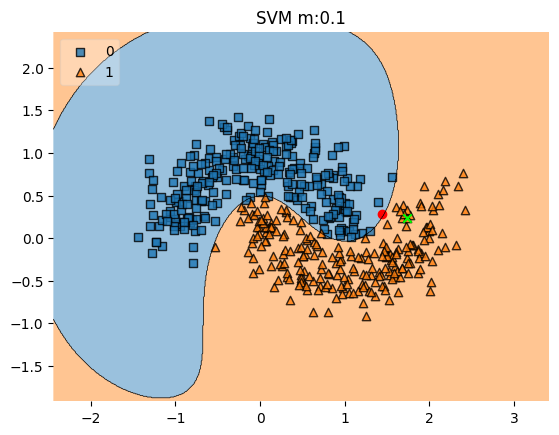

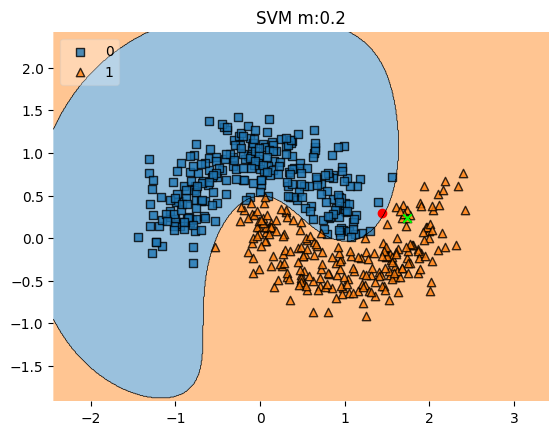

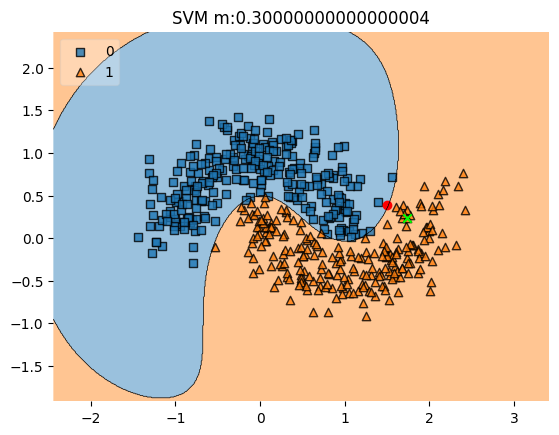

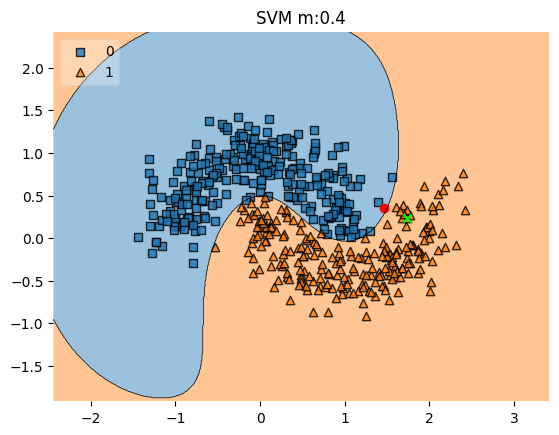

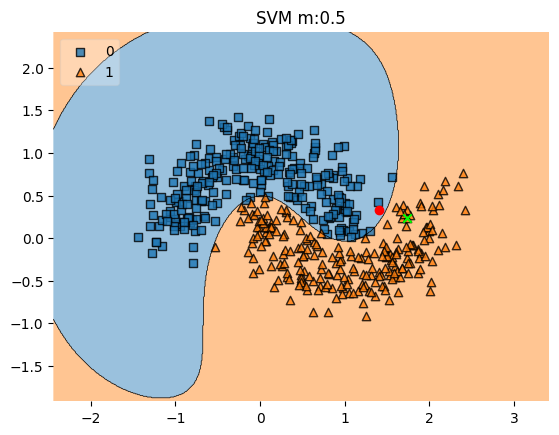

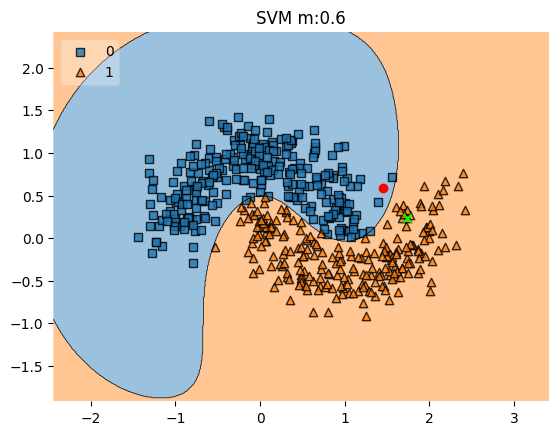

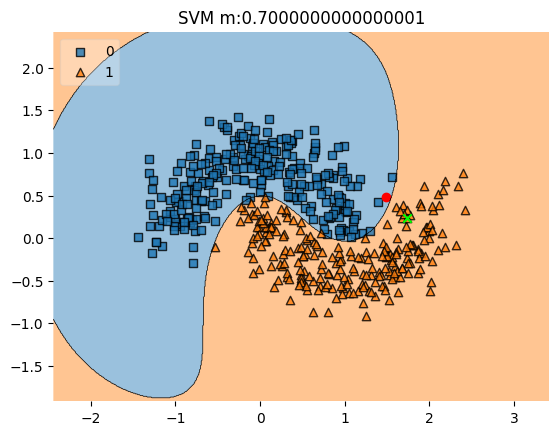

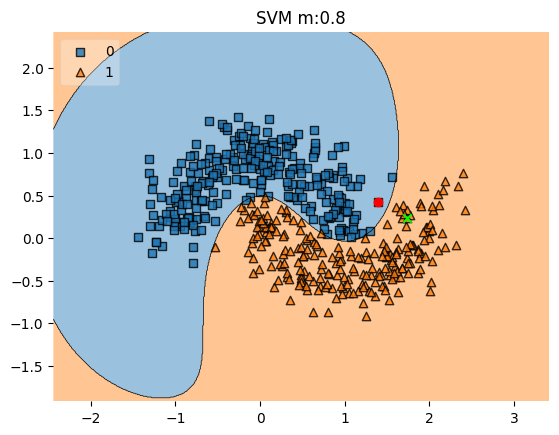

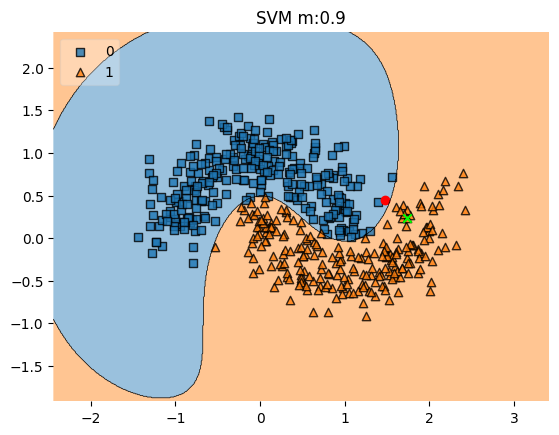

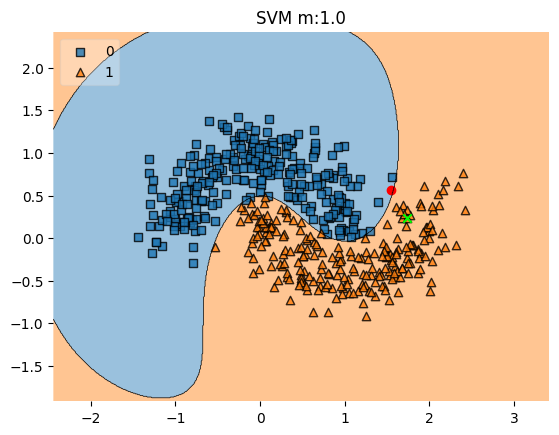

In [41]:
# SVM varier m
#choice = np.random.choice(len(data_test))
#obs = data_test[choice]

svmClassifier = svm.SVC()
svmClassifier.fit(data_train, labels_train)
prediction = svmClassifier.predict(data_test)
m_values = np.linspace(0.1,1, num=10)
for m in m_values:
    enemy = GrowingSpheres(svmClassifier, obs, m, 20)
    plotEverything(data_test,prediction,svmClassifier,'SVM m:'+str(m), obs, enemy)

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

breast_cancer = datasets.load_breast_cancer()
data = breast_cancer['data']
target = breast_cancer['target']
X_train,X_test,y_train,y_test = train_test_split(data, target,test_size=0.25, random_state=1234)
feature_names = breast_cancer['feature_names']
target_names = breast_cancer['target_names']

logreg = LogisticRegression(class_weight='balanced', max_iter=10000).fit(X_train, y_train)

